In [23]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from    scipy.cluster.hierarchy  import  dendrogram , linkage  
from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering

#### Example 1

In [12]:
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])

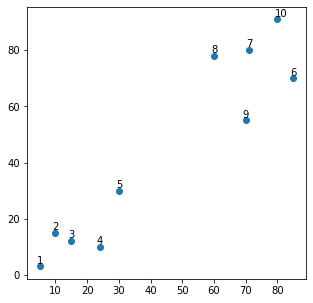

In [13]:
labels = range(1, 11)  
plt.figure(figsize=(5, 5))  
#plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label,x,y in  zip(labels, X[:,0], X[:,1]):  
    plt.annotate(label , xy =(x,y) , xytext=(-3,3) , textcoords='offset points')

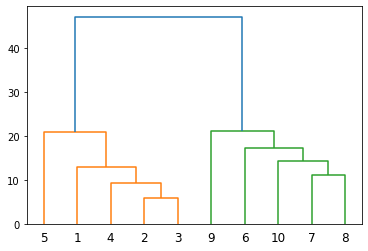

In [14]:
dendrogram( linkage(X,'single'), labels=range(1, 11) );

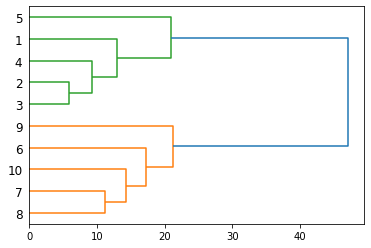

In [15]:
dendrogram(linkage(X ,'single'),  
            orientation = 'right',
            labels = range(1 , 11),
            distance_sort = 'descending',
            show_leaf_counts=True);

#### Example 2

In [2]:
d = pd.read_csv('shopping_data.csv')  

In [3]:
d.shape  

(200, 5)

In [4]:
d.head()  

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data = d.iloc[:, [3,4]].values  

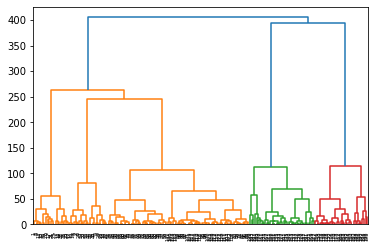

In [6]:
import scipy.cluster.hierarchy as shc

k = shc.linkage(data, method='ward')

dend = shc.dendrogram(k)  

In [ ]:
# If we draw a horizontal line that passes through longest distance without a horizontal line, 
# we get 5 clusters.

In [7]:
# Role of Dendrograms for Hierarchical Clustering
# Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters.

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='ward')  

cluster.fit_predict(data)  # 5 cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

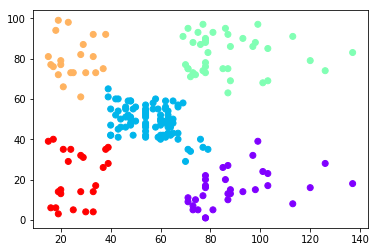

In [21]:
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow');  

#### Example 3

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]        

In [19]:
w2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
w3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
w4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)

Text(0.5, 1.0, 'K=4')

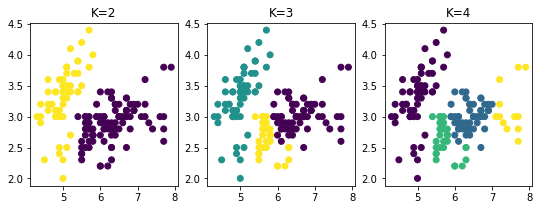

In [20]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=w2.labels_)
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=w3.labels_)
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=w4.labels_) 
plt.title("K=4")

#### Example 4

In [24]:
X = np.array([  [10,5],  
                [20,2],
                [30,3],
                [70,4],
                [80,2],
                [90,6],
                [100,3],
             ])

In [25]:
 cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  

In [26]:
# Ward can only work with euclidean distances.

In [27]:
#cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')  
#cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
#cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  

In [28]:
cluster.fit_predict(X);  

In [29]:
cluster.labels_

array([1, 1, 1, 0, 0, 0, 0], dtype=int64)

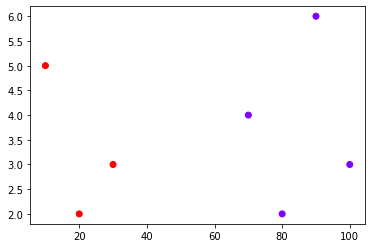

In [30]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow') ; 

affinity : 
    string or callable, default: “euclidean”
    Metric used to compute the linkage. 
    Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. 
    If linkage is “ward”, only “euclidean” is accepted. 
    If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input 
    for the fit method.

inkage : 
    {“ward”, “complete”, “single”, “average”}, optional (default=”ward”)
    The linkage criterion determines which distance to use between sets of observation. 
    The algorithm will merge the pairs of cluster that minimize this criterion.
    ward minimizes the variance of the clusters being merged.
    complete or maximum linkage uses the maximum distances between all observations of the two sets.
    single uses the minimum of the distances between all observations of the two sets.
    average uses the average of the distances of each observation of the two sets.
